# Clustering

**cluster** - group of objects, that are similar to others in the cluster, and *dissimilar* to objects in other clusters

### Difference Between cl and cs
**classification**
- used on labeled data
- to build a model for prediction of those labels

__clustering__
- used on unlabeled data
- to identify patterns (e.g. buying patterns of demographic/age groups)
examples:
-

# k-Means Clustering

Algorithm:
1. Choose __k__ - number of clusters
2. Randomly pick __k__ points in data set (points might be chosen from existing data-points or just randomly), to be __centroids__ for clusters
![](k_means_clustering/k_means_clustering.png)
3. Assign each point to it's closest __centroid__
![](k_means_clustering/1_k_means_clustering.png)
At this point, clusters might be bad, so adjustment is required

4. For each cluster calculate it's mean point
5. For each cluster move it's centroid to it's mean point
![](k_means_clustering/2_k_means_clustering.png)
6. Repeat steps 3-5, until centroids no longer move
![](k_means_clustering/3_k_means_clustering.png)

Algorithm aims at local maximum, and thus, optimum result might not be achieved on first run. Since algorithm runs fast, it's sensible to run it multiple times

## Calculating Accuracy
- External approach
    - Compare result with ground truth (it's rarely available)
- Internal approach
    - Average distance between data points within cluster
    - Average distance to centroid of cluster

## Choosing k
One option is to run accros different values of __k__, and look at metric of accuracy
![](k_means_clustering/4_k_means_clustering.png)
Since increase of __k__, always reduces mean distance, usually value of __k__ is plotted and __elbow__ is chosen - place, when rate of decrease sharply shifts

# Practice

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../resources/week_4/Cust_Segmentation.csv").drop("Address", 1)
X = data.values[:,1:] # take all rows, columns - from 1st to last
X = np.nan_to_num(X)

In [3]:
# Before modeling is done, data should be brought to similar magnitude, or else some features might get lost, and some might have too much influence
Clus_dataSet = StandardScaler().fit_transform(X)

In [4]:
k = 3
k_means = KMeans(init="k-means++", n_clusters=k, n_init=12) # n_init - num of runs
k_means.fit(X)
labels = k_means.labels_
# 1d array of numerical labels, label for each row
print(len(labels))
print(data.shape)
print(labels)

850
(850, 9)
[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1

In [5]:
X[:, 1]

array([2., 1., 2., 2., 1., 1., 2., 3., 1., 3., 3., 2., 1., 1., 3., 1., 1.,
       4., 1., 1., 2., 3., 3., 1., 4., 1., 1., 1., 2., 2., 3., 2., 2., 3.,
       1., 2., 3., 1., 1., 3., 1., 3., 2., 5., 1., 3., 1., 1., 1., 2., 1.,
       1., 1., 1., 3., 1., 1., 3., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       1., 1., 3., 4., 2., 2., 1., 1., 1., 2., 2., 2., 1., 3., 3., 1., 2.,
       1., 4., 2., 2., 4., 2., 2., 1., 1., 3., 2., 1., 1., 2., 3., 1., 4.,
       1., 1., 2., 1., 1., 1., 2., 3., 1., 4., 1., 1., 1., 2., 1., 1., 2.,
       1., 2., 2., 4., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 3., 1., 4.,
       2., 1., 1., 2., 2., 2., 2., 1., 1., 3., 1., 3., 2., 2., 1., 1., 3.,
       1., 2., 1., 1., 1., 2., 3., 1., 3., 2., 1., 2., 4., 3., 1., 1., 4.,
       2., 1., 3., 3., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 3., 2., 1.,
       1., 1., 4., 1., 1., 3., 2., 2., 3., 2., 1., 3., 3., 1., 2., 3., 1.,
       1., 1., 2., 1., 1., 4., 1., 1., 1., 4., 1., 1., 2., 4., 1., 1., 2.,
       3., 2., 4., 1., 1.

In [6]:
data["Clus_km"] = labels

# Checking centroids for clusters
data.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


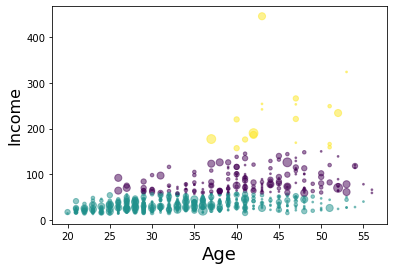

In [7]:
area = np.pi * (X[:, 1])**2
# plot age to income, giving each point on plot different size
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

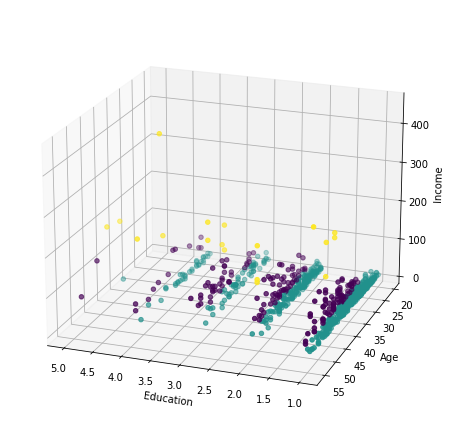

In [8]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=110)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

# Conclusions based on plots
There are three groups:
- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME

# Calculating k

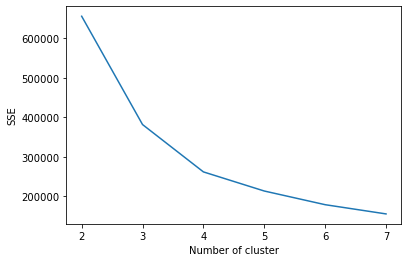

In [9]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("../resources/week_4/Cust_Segmentation.csv").drop("Address", 1)
X = data.values[:, 1:]
X = np.nan_to_num(X)

accuracy_scores = {}
for i in range(2, 8):
    k_means = KMeans(init="k-means++", n_clusters=i, n_init=12).fit(X)
    accuracy_scores[i] = k_means.inertia_

plt.figure()
plt.plot(list(accuracy_scores.keys()), list(accuracy_scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()